In [2]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import subprocess
import json

# モデルの入力パラメータの定義（パラメータとその範囲）
problem = {
    'num_vars': 10,  # パラメータの数
    'names': ['wall_u_value', 'glass_u_value', 'glass_eta_value', 'Qref_rated_cool', 'Qref_rated_heat',
                'AirHeatExchangeRateCooling', 'AirHeatExchangeRateHeating', 'Fan_air_volume', 'Lighting_rated_power', 'Hot_water_rated_capacity'],
    'bounds': [
        # [0.01, 1000],       # wall_u_valueの範囲 [0.05, 10]
        # [0.01, 1000],       # glass_u_valueの範囲
        # [0.01, 1000],       # glass_eta_valueの範囲
        # [100, 100000],     # Qref_rated_coolの範囲
        # [100, 100000],     # Qref_rated_heatの範囲
        # [1, 10000],         # AirHeatExchangeRateCoolingの範囲
        # [1, 10000],         # AirHeatExchangeRateHeatingの範囲
        # [10, 3000],     # Fan_air_volumeの範囲
        # [0, 1000000],      # Lighting_rated_powerの範囲
        # [15.0, 25.0]
        [0.01, 5],       # wall_u_valueの範囲
        [0.01, 5],       # glass_u_valueの範囲
        [0.01, 5],       # glass_eta_valueの範囲
        [1200, 1600],     # Qref_rated_coolの範囲
        [1000, 1300],     # Qref_rated_heatの範囲
        [40, 60],         # AirHeatExchangeRateCoolingの範囲
        [20, 40],         # AirHeatExchangeRateHeatingの範囲
        [2000, 3000],     # Fan_air_volumeの範囲
        [0, 10000],      # Lighting_rated_powerの範囲
        [15.0, 25.0]
    ]
}

# Saltelliサンプリングで入力サンプルを生成
param_values = saltelli.sample(problem, 1024)

# モデルの実行とBEI値の取得
def run_model(params):
    # param.datファイルに新しいパラメータ値を書き込む
    with open("param.dat", "w") as f:
        f.write(f"wall_u_value = {params[0]}\n")
        f.write(f"glass_u_value = {params[1]}\n")
        f.write(f"glass_eta_value = {params[2]}\n")
        f.write(f"Qref_rated_cool = {params[3]}\n")
        f.write(f"Qref_rated_heat = {params[4]}\n")
        f.write(f"AirHeatExchangeRateCooling = {params[5]}\n")
        f.write(f"AirHeatExchangeRateHeating = {params[6]}\n")
        f.write(f"Fan_air_volume = {params[7]}\n")
        f.write(f"Lighting_rated_power = {params[8]}\n")
        f.write(f"Hot_water_rated_capacity = {params[9]}\n")

    # 外部のPythonスクリプトを実行
    subprocess.run(["python3", "generate_input_zebopt_for_sensitivity.py", "param.dat", "input_zebopt.json"])
    subprocess.run(["python3", "../builelib_zebopt_run.py", "input_zebopt.json", "zebopt"])

    # 実行結果のBEI値をJSONから取得
    with open("zebopt_result.json", "r") as f:
        output_data = json.load(f)
        return output_data["BEI"]

# 各サンプルに対してモデルを実行し、BEI値を取得
Y = np.array([run_model(params) for params in param_values])

# Sobol感度分析を実行
Si = sobol.analyze(problem, Y, print_to_console=True)

# 結果の表示
print("一次Sobol指数 (S1):", Si['S1'])
print("全順序Sobol指数 (ST):", Si['ST'])

/var/folders/gb/554jf77919n71lnl_60zjctm0000gn/T/ipykernel_27510/1647040075.py:37: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1024)


BEI値: 1.000, 総実行時間: 0.50 秒
BEI値: 1.170, 総実行時間: 0.49 秒
BEI値: 1.040, 総実行時間: 0.49 秒
BEI値: 1.060, 総実行時間: 0.50 秒
BEI値: 0.990, 総実行時間: 0.48 秒
BEI値: 1.000, 総実行時間: 0.48 秒
BEI値: 1.000, 総実行時間: 0.47 秒
BEI値: 1.000, 総実行時間: 0.46 秒
BEI値: 1.000, 総実行時間: 0.49 秒
BEI値: 0.980, 総実行時間: 0.50 秒
BEI値: 1.000, 総実行時間: 0.50 秒
BEI値: 1.040, 総実行時間: 0.47 秒
BEI値: 1.170, 総実行時間: 0.49 秒
BEI値: 1.190, 総実行時間: 0.48 秒
BEI値: 1.210, 総実行時間: 0.46 秒
BEI値: 1.200, 総実行時間: 0.48 秒
BEI値: 1.200, 総実行時間: 0.47 秒
BEI値: 1.200, 総実行時間: 0.47 秒
BEI値: 1.200, 総実行時間: 0.47 秒
BEI値: 1.210, 総実行時間: 0.50 秒
BEI値: 1.200, 総実行時間: 0.48 秒
BEI値: 1.200, 総実行時間: 0.50 秒
BEI値: 1.170, 総実行時間: 0.48 秒
BEI値: 1.140, 総実行時間: 0.51 秒
BEI値: 1.160, 総実行時間: 0.49 秒
BEI値: 1.080, 総実行時間: 0.50 秒
BEI値: 1.160, 総実行時間: 0.48 秒
BEI値: 1.180, 総実行時間: 0.49 秒
BEI値: 1.170, 総実行時間: 0.52 秒
BEI値: 1.170, 総実行時間: 0.48 秒
BEI値: 1.170, 総実行時間: 0.48 秒
BEI値: 1.160, 総実行時間: 0.48 秒
BEI値: 1.170, 総実行時間: 0.49 秒
BEI値: 1.010, 総実行時間: 0.52 秒
BEI値: 0.980, 総実行時間: 0.48 秒
BEI値: 1.120, 総実行時間: 0.48 秒
BEI値: 1.000, 総実行時間: 0.49 秒
B

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                                  ST   ST_conf
wall_u_value                0.703010  0.071718
glass_u_value               0.039896  0.006973
glass_eta_value             0.241636  0.021691
Qref_rated_cool             0.076809  0.006420
Qref_rated_heat             0.002821  0.000323
AirHeatExchangeRateCooling  0.002272  0.000234
AirHeatExchangeRateHeating  0.000015  0.000017
Fan_air_volume              0.000000  0.000000
Lighting_rated_power        0.084865  0.007573
Hot_water_rated_capacity    0.000000  0.000000
                                  S1   S1_conf
wall_u_value                0.564233  0.068712
glass_u_value               0.013913  0.015296
glass_eta_value             0.118373  0.047029
Qref_rated_cool             0.072866  0.025695
Qref_rated_heat             0.000836  0.004409
AirHeatExchangeRateCooling  0.000308  0.003756
AirHeatExchangeRateHeating -0.000024  0.000033
Fan_air_volume              0.000000  0.000000
Lighting_rated_power        0.079920  0.024588
Hot_water_rat

In [3]:
Si['S1']

array([ 5.64232506e-01,  1.39129786e-02,  1.18372578e-01,  7.28655518e-02,
        8.35887282e-04,  3.07633008e-04, -2.39179690e-05,  0.00000000e+00,
        7.99197736e-02,  0.00000000e+00])

In [15]:
 Si['ST']

array([7.03009800e-01, 3.98956592e-02, 2.41636358e-01, 7.68090604e-02,
       2.82065788e-03, 2.27219662e-03, 1.46909264e-05, 0.00000000e+00,
       8.48645850e-02, 0.00000000e+00])

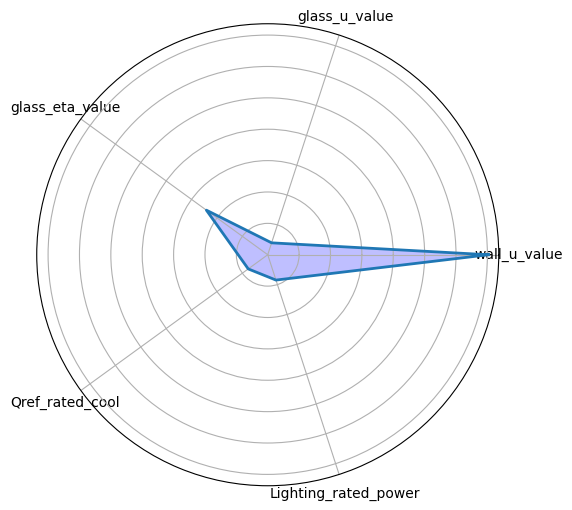

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Original data and categories
categories = ['wall_u_value', 'glass_u_value', 'glass_eta_value', 'Qref_rated_cool', 'Qref_rated_heat',
              'AirHeatExchangeRateCooling', 'AirHeatExchangeRateHeating', 'Fan_air_volume', 'Lighting_rated_power', 'Hot_water_rated_capacity']

# Corresponding data (Si['ST'])
data = Si['ST']

# Filter out values less than 1.0e-02 and corresponding categories
filtered_data = data[data >= 1.0e-02]
filtered_categories = [cat for cat, value in zip(categories, data) if value >= 1.0e-02]

# Number of variables after filtering
num_vars = len(filtered_categories)

# Compute the angle for each category
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop by adding the first value to the end
angles += angles[:1]
filtered_data = np.concatenate((filtered_data, [filtered_data[0]]))

# Create radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot the radar chart
ax.plot(angles, filtered_data, linewidth=2, linestyle='solid')
ax.fill(angles, filtered_data, 'b', alpha=0.25)

# Add labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(filtered_categories)

# Display the radar chart
plt.show()

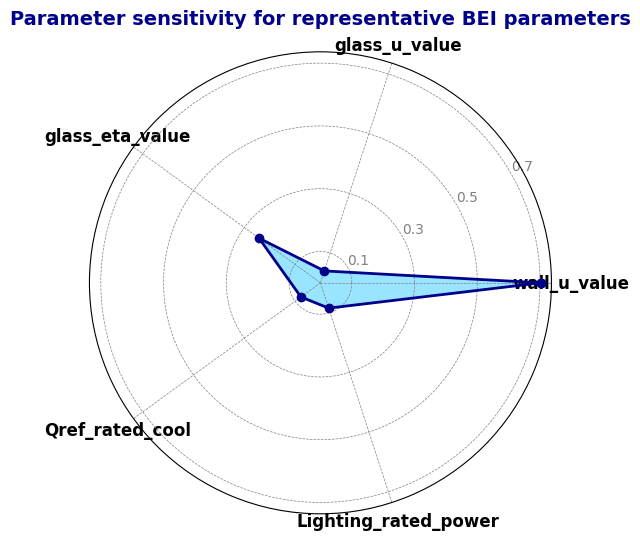

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Original data and categories
categories = ['wall_u_value', 'glass_u_value', 'glass_eta_value', 'Qref_rated_cool', 'Qref_rated_heat',
              'AirHeatExchangeRateCooling', 'AirHeatExchangeRateHeating', 'Fan_air_volume', 'Lighting_rated_power', 'Hot_water_rated_capacity']

# Corresponding data (Si['ST'])
data = Si['ST']

# Filter out values less than 1.0e-02 and corresponding categories
filtered_data = data[data >= 1.0e-02]
filtered_categories = [cat for cat, value in zip(categories, data) if value >= 1.0e-02]

# Number of variables after filtering
num_vars = len(filtered_categories)

# Compute the angle for each category
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop by adding the first value to the end
angles += angles[:1]
filtered_data = np.concatenate((filtered_data, [filtered_data[0]]))

# Create radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot the radar chart with enhancements
ax.plot(angles, filtered_data, linewidth=2, linestyle='solid', color='darkblue', marker='o')  # Dark blue line with markers
ax.fill(angles, filtered_data, 'deepskyblue', alpha=0.4)  # Light blue fill with transparency

# Add radial gridlines and labels
ax.set_rlabel_position(30)
ax.grid(color='gray', linestyle='--', linewidth=0.5)  # Light gray dashed gridlines
ax.set_yticks([0.1, 0.3, 0.5, 0.7])  # Set radial ticks for clarity
ax.set_yticklabels(['0.1', '0.3', '0.5', '0.7'], fontsize=10, color='gray')  # Radial tick labels

# Add labels with bigger font for clarity
ax.set_xticks(angles[:-1])
ax.set_xticklabels(filtered_categories, fontsize=12, fontweight='bold', color='black')  # Bold, larger labels

# Add title to make the chart more informative
ax.set_title('Parameter sensitivity for representative BEI parameters', size=14, fontweight='bold', color='darkblue', pad=20)

# Show the radar chart
plt.show()